## Vamos a crear un modelo de Machine Learning

Ya sabemos cuales son los pasos para desarrollar un modelo de Machine Learning, ahora vamos a crear un modelo de ML utilizando el dataset de Vinos que tenemos en nuestro repositorio.

Recordando los pasos para crear un modelo de ML:
1. **Definir el problema**: Identificar claramente el problema que queremos resolver con nuestro modelo de ML.
2. **Recolección de datos**: Obtener los datos necesarios para entrenar nuestro modelo.
3. **Preprocesamiento de datos**: Limpiar y preparar los datos para el entrenamiento del modelo.
4. **Selección del modelo**: Elegir el algoritmo de ML adecuado para nuestro problema.
5. **Entrenamiento del modelo**: Utilizar los datos preprocesados para entrenar el modelo seleccionado.
6. **Evaluación del modelo**: Evaluar el rendimiento del modelo utilizando métricas adecuadas.
7. **Ajuste del modelo**: Realizar ajustes en el modelo para mejorar su rendimiento, si es necesario.
8. **Implementación del modelo**: Desplegar el modelo para su uso en un entorno de producción.

En la seleccion de modelos de Mahine Learning, es casi siempre recomendable hacer si o si un **dummy model**, es decir un modelo que no hace nada, para tener una referencia de lo que es un modelo que no hace nada, y un modelo de **OLS**, que es un modelo de regresion lineal, para tener una referencia de lo que es un modelo de regresion lineal, y luego comparar los resultados con el modelo que vamos a crear.

Un Modelo de ML siempre tiene que ser mejor que un modelo dummy o de un modelo de OLS, si no es asi, entonces el modelo de ML no esta haciendo nada, y no tiene sentido utilizarlo.

Lo primero que hay que hacer es un **split** de los datos, es decir, separar los datos en un conjunto de entrenamiento y un conjunto de prueba, para poder evaluar el rendimiento del modelo de ML que vamos a crear. Usualmente se utiliza un 80% de los datos para el entrenamiento y un 20% para la prueba, pero esto puede variar dependiendo del tamaño del dataset y de la cantidad de datos disponibles.



## Construyendo un modelo de ML desde Cero

### 1. Definir el problema

Para esta prueba tenemos el dataset de vinos, que tiene como objetivo predecir la calidad de un vino a partir de sus características fisicoquímicas. Por lo tanto, nuestro problema es poder crear un modelo que pueda predecir la calidad de un vino a partir de sus características fisicoquímicas.

### 2. Recolección de datos

Ya tenemos el dataset de vinos, que se encuentra en nuestro repositorio, por lo tanto, no necesitamos recolectar datos, ya los tenemos.

In [4]:
# cargamos algunas librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# cargamos la base de datos de vinos rojos
df = pd.read_csv("../ydata-profiling/wine+quality/winequality-red.csv", sep=";")
# mostramos las primeras filas del dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 3. Preprocesamiento de datos

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Aqui vemos que no tenemos datos faltantes, ademas tengo 1599 registros. 

Tengo 10 columnas de características fisicoquímicas y una columna de calidad, que es la variable objetivo. La variable objetivo es una variable categórica, que tiene valores enteros. Por lo tanto, nuestro problema es un problema de clasificación, ya que queremos predecir una variable categórica usando variables numéricas.

In [7]:
#rango de la variable de calidad
print("Rango de la variable de calidad:", df["quality"].min(), "-", df["quality"].max())

Rango de la variable de calidad: 3 - 8


In [8]:
# corroboramos que no tenemos datos faltantes
print("Datos faltantes por columna:")
print(df.isnull().sum())

Datos faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# vamos a ver un poco la distribución de todo
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [13]:
# Vamos a determinar las significancias de las variables
# para la significancia vamos a hacerlo con la formula de pearson p y si p es menos a 0.20 entonces la variable es significativa

for column in df.columns:
    xbar = df[column].mean()
    sigma = df[column].std()
    p = sigma/xbar
    if p < 0.20:
        print(f"{column} es significativa con p={p:.2f}")
    else:
        print(f"{column} no es significativa con p={p:.2f}")

fixed acidity no es significativa con p=0.21
volatile acidity no es significativa con p=0.34
citric acid no es significativa con p=0.72
residual sugar no es significativa con p=0.56
chlorides no es significativa con p=0.54
free sulfur dioxide no es significativa con p=0.66
total sulfur dioxide no es significativa con p=0.71
density es significativa con p=0.00
pH es significativa con p=0.05
sulphates no es significativa con p=0.26
alcohol es significativa con p=0.10
quality es significativa con p=0.14


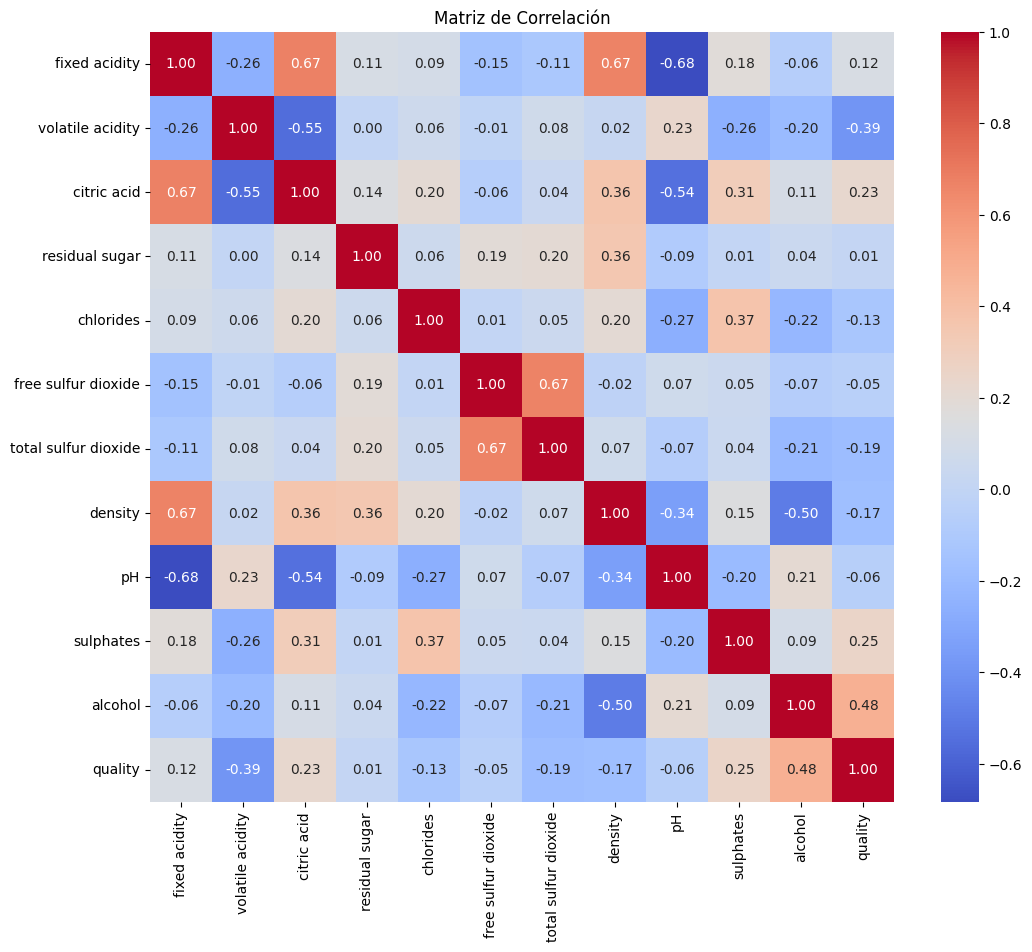

In [14]:
# tambien podemos ver la correlacion entre las variables
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

### 4. Selección del modelo

Podemos empezar con un modelo **dummy**, que es un modelo que no hace nada. 

In [11]:
# primero vamos a hacer el split de los datos
X = df.drop("quality", axis=1)
y = df["quality"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

### 5. Entrenamiento del modelo

### 6. Evaluación del modelo

### 7. Ajuste del modelo con hiperparametros

### 8. Implementación del modelo